In [1]:
import pandas as pd
df=pd.read_csv('Retail_Sales_Data.csv')
df.head()

,Transaction_ID,Customer_ID,State,Age,Shop_Category,Sales,Gender,Items_in_basket
0,1,1234,MP,10,Grocery,10,M,2
1,2,1235,UP,21,Dairy,30,F,3
2,3,1236,AP,23,Deli,23,F,4
3,4,1237,RP,25,Meat,21,F,4
4,5,1238,DP,27,Clothes,90,F,3


In [5]:
relevant_features=df[['State','Sales','Shop_Category']]
relevant_features.head()

,State,Sales,Shop_Category
0,MP,10,Grocery
1,UP,30,Dairy
2,AP,23,Deli
3,RP,21,Meat
4,DP,90,Clothes


In [18]:
sales_by_region=relevant_features.groupby('State')['Sales'].sum().reset_index()
sales_by_region.head()

# region_sales = data.groupby('State')['Sales'].sum().reset_index()
# print(region_sales)

,State,Sales
0,AP,12176
1,DP,23346
2,KP,10887
3,MP,4916
4,RP,11049


[]

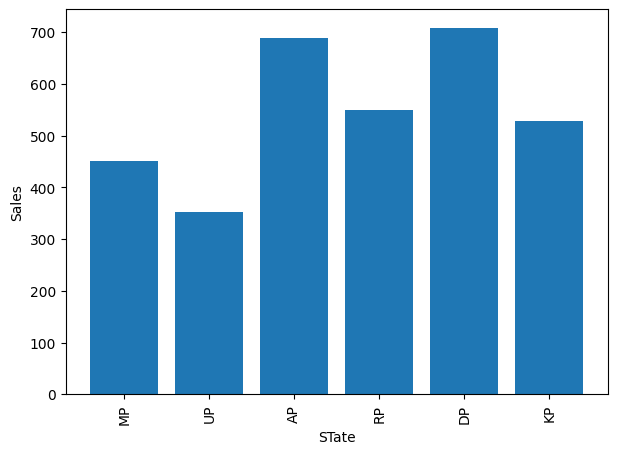

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.bar(relevant_features['State'],relevant_features['Sales'])
plt.xlabel("STate")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.plot()

[]

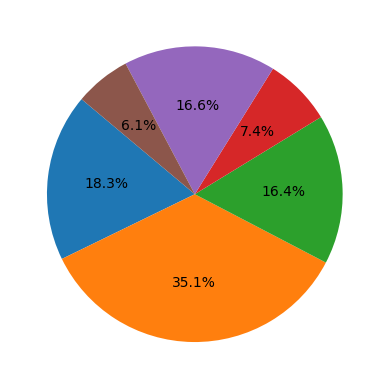

In [22]:
# plt.pie(sales_by_region)
plt.pie(sales_by_region['Sales'], labels=sales_by_region['State'] ,autopct='%1.1f%%', startangle=140)
plt.plot()

In [27]:
toppers=sales_by_region.sort_values(by='Sales',ascending=False)
top=toppers.iloc[0]
print(top)

State       DP
Sales    23346
Name: 1, dtype: object


In [29]:
S_C=relevant_features.groupby(['State','Shop_Category'])['Sales'].sum().reset_index()
S_C.head()

,State,Shop_Category,Sales
0,AP,Clothes,2127
1,AP,Dairy,1197
2,AP,Deli,1303
3,AP,Electronics,3818
4,AP,Grocery,823


<Axes: xlabel='State'>

<Figure size 700x500 with 0 Axes>

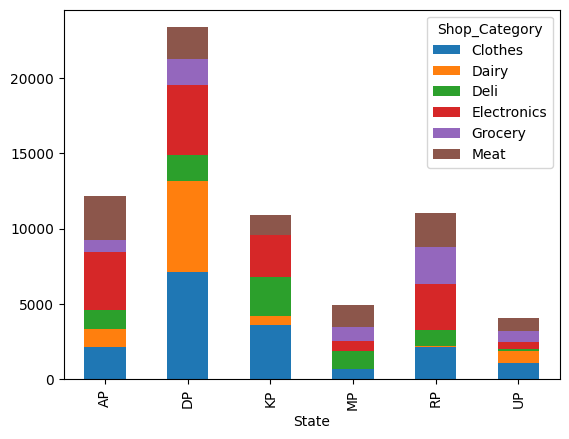

In [32]:
pivot_df=S_C.pivot(index="State",columns='Shop_Category',values="Sales")
plt.figure(figsize=(7,5))
pivot_df.plot(kind='bar',stacked=True)